In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 115s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

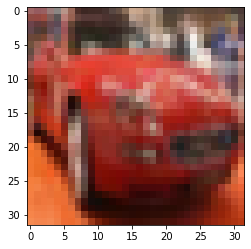

In [6]:
plt.imshow(X_train[5])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
y_test


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

# Output layers
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,610,026
Trainable params: 1,610,026
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4076 - accuracy: 0.4960 - val_loss: 1.2210 - val_accuracy: 0.5747
Epoch 2/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0915 - accuracy: 0.6203 - val_loss: 1.0764 - val_accuracy: 0.6295
Epoch 3/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9400 - accuracy: 0.6713 - val_loss: 1.0066 - val_accuracy: 0.6476
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8165 - accuracy: 0.7149 - val_loss: 1.0314 - val_accuracy: 0.6432
Epoch 5/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7026 - accuracy: 0.7527 - val_loss: 1.0239 - val_accuracy: 0.6604


In [14]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

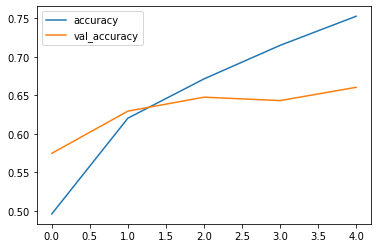

In [16]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

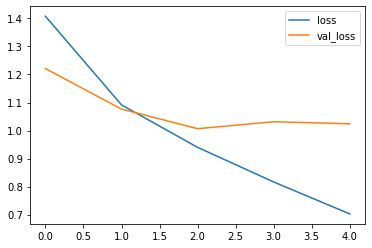

In [17]:
metrics[['loss','val_loss']].plot()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1000
           1       0.82      0.74      0.78      1000
           2       0.63      0.42      0.51      1000
           3       0.50      0.41      0.45      1000
           4       0.61      0.62      0.61      1000
           5       0.50      0.66      0.57      1000
           6       0.66      0.77      0.71      1000
           7       0.71      0.73      0.72      1000
           8       0.75      0.80      0.77      1000
           9       0.78      0.71      0.74      1000

    accuracy                           0.66     10000
   macro avg    

In [19]:
print(confusion_matrix(y_test,predictions))

[[736  12  48  16  15  17  21  22  80  33]
 [ 31 742  10  17   6   8  15   8  59 104]
 [ 79   6 425  77 112 133  92  50  17   9]
 [ 24   5  45 406  77 261 101  46  24  11]
 [ 30   2  44  55 618  63  82  80  24   2]
 [ 18   2  31 131  52 659  40  52   7   8]
 [  5   2  32  46  57  66 774   6   9   3]
 [ 13   4  25  37  66  90  15 733   6  11]
 [ 91  36   8  11   2   8  10   9 803  22]
 [ 46  91   9  24  10  22  17  26  47 708]]


In [26]:
new = X_train[200]

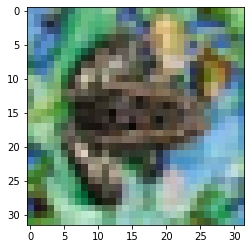

In [27]:
plt.imshow(new)

In [28]:
model.predict_classes(new.reshape(1,32,32,3))

array([6], dtype=int64)